
# Vibhor Malik - Upgrad - Linear Regression - BoomBike Assignment

## Step 1: Reading and Understanding the Data


In [1]:
#Importing necessary libraries for reading and working on data set, visualization and working on ML models

import numpy as np
import pandas as pd

#for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Using sklearn to perform multiple operation
import sklearn
# Using sklearn.model_selection for creating train/test set
from sklearn.model_selection import train_test_split

# Using sklearn.preprocessing for MinMax scaling
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading CSV files and save it into a DF
bike_df = pd.read_csv('day.csv')
#check overview of the data by looking at top 5 rows
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Inspect the various aspects of the bike_df dataframe

In [4]:
# check for null values and datatypes of all the columns
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# check the size of DF with rows & columns
bike_df.shape

(730, 16)

### Drop not required columns
1. `['instant']` column is a series of numbers starting from 1, but we have a default index which starts from 0, so we can drop this column
2. `['dteday']` column hald already been bifurcated into year, month, day etc - thus we dont need this column
3. `['casual']` and `['registered']` column are not required since sum of it is available in `['cnt']`


In [6]:
bike_df.drop(['instant'],axis=1,inplace=True)
bike_df.drop(['dteday'],axis=1,inplace=True)
bike_df.drop(['casual'],axis=1,inplace=True)
bike_df.drop(['registered'],axis=1,inplace=True)

#### rename column with more useful names
Some columns are with short forms, which needs to be changed to more senseful column names - thus renaming columns

In [7]:
bike_df.rename(columns = {'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 


###  converting some columns' numeric values into categorical string values

As the problem statement mentioned to 'not' drop some columns as they are not categorical and its values should be changed to some text values - thus changing `['weathersit']` and `['season']` columns

In [8]:
bike_df['season']=bike_df['season'].map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike_df['weathersit']=bike_df['weathersit'].map({1: 'clear',2:'mist',3:'light_snow',4:'heavy_rain'})
bike_df['month'] = bike_df['month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
bike_df['weekday'] = bike_df['weekday'].map({1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat', 0:'Sun'})

## Step 3: Visualising the Data
#### Target is to find corelations between columns, multicollinearity, indentify predictors

### Visualising Numeric continuous Variables

Looking at the pair-plot among the numerical variables, which one has the highest correlation with the target variable

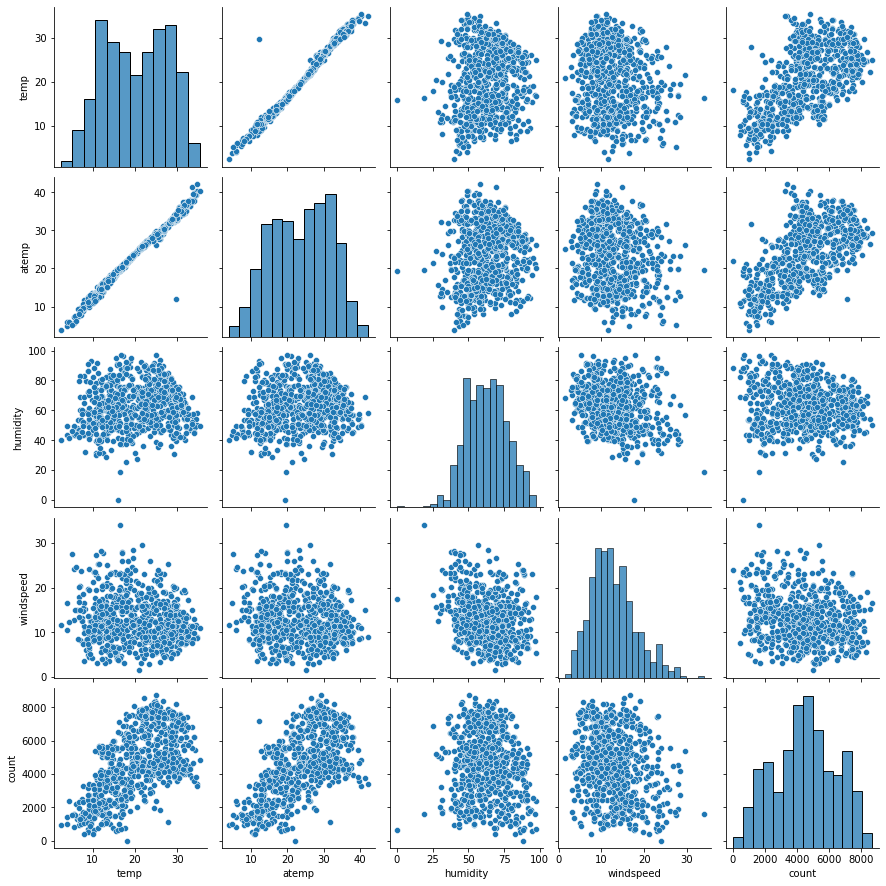

In [9]:
sns.pairplot(bike_df[['temp','atemp','humidity','windspeed','count']])
plt.show()

We will take two key decisions from this pair plots
1. we can clearly see that `atemp` variable has a clear correlation with Target Variable `count` 
2. temp and atemp columns are very much alike, so there could be a chance of multi-collinearity, thus we need to drop one column out of it
 
 a) dropping temp because atemp is a feeling temp - and customers will more rely on biking decision on what they are feeling in the weather

In [10]:
bike_df.drop(['temp'],axis=1,inplace=True)

### plotting bar graph with categorical variables to find insights

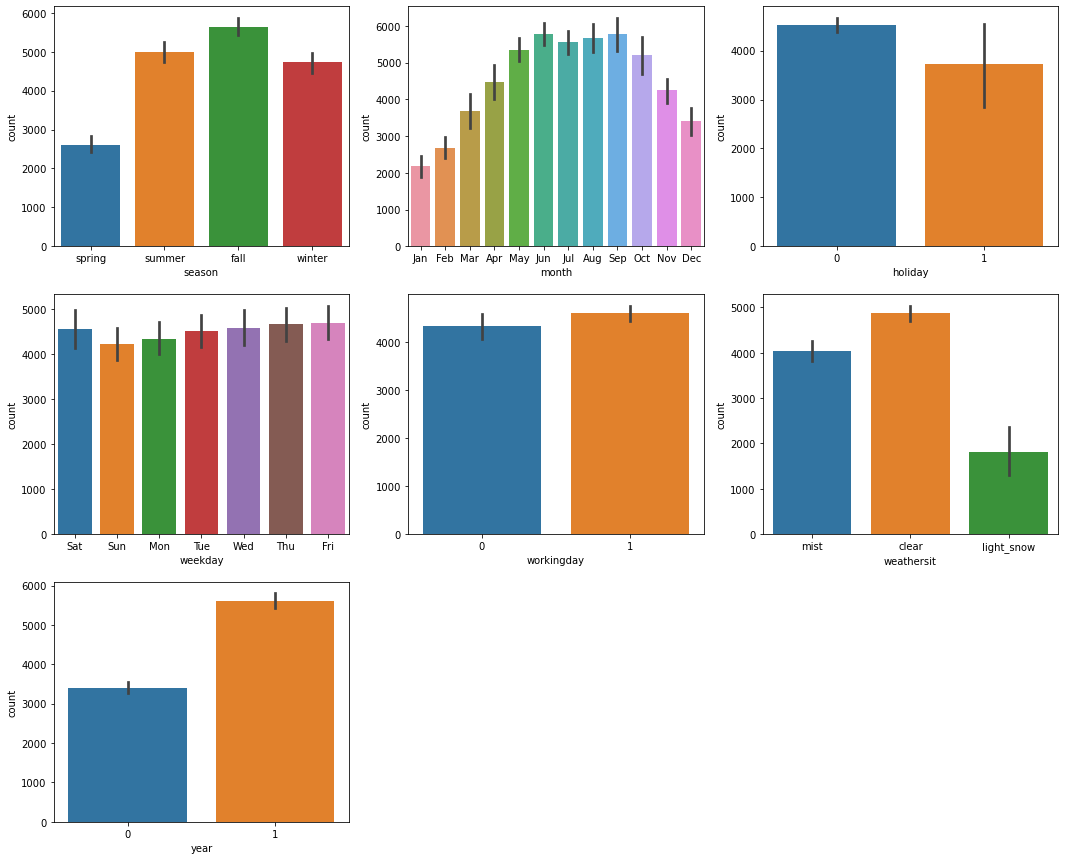

In [11]:
plt.figure(figsize=(18,15))
plt.subplot(3,3,1)
sns.barplot(x='season', y='count', data=bike_df)

plt.subplot(3,3,2)
sns.barplot(x='month', y='count', data=bike_df)

plt.subplot(3,3,3)
sns.barplot(x='holiday', y='count', data=bike_df)

plt.subplot(3,3,4)
sns.barplot(x='weekday', y='count', data=bike_df)

plt.subplot(3,3,5)
sns.barplot(x='workingday', y='count', data=bike_df)

plt.subplot(3,3,6)
sns.barplot(x='weathersit', y='count', data=bike_df)


plt.subplot(3,3,7)
sns.barplot(x='year', y='count', data=bike_df)
plt.show()

### points to note from above charts
1. Most people prefer fall and summer season
2. Most people prefer May to Oct month
3. Most people prefer non holiday day - guessing people use these bikes for office commute
4. Most people prefer to biking clear weather
5. Boom bike business has grown very well in 2019

### Finding outliers in the continous numerica columns data and trying to clean it

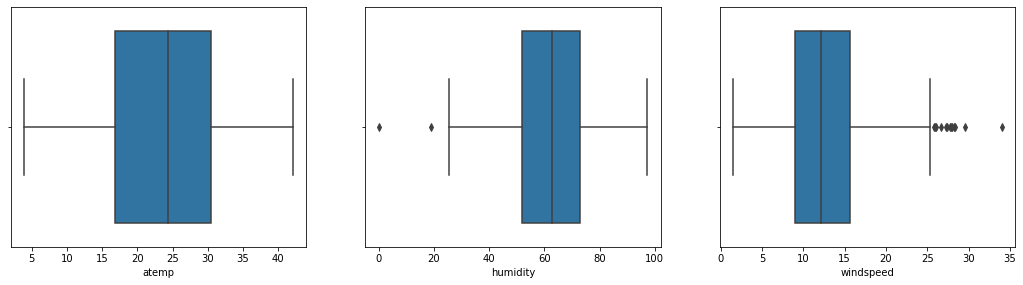

In [12]:
plt.figure(figsize=(18,15))
plt.subplot(3,3,1)
sns.boxplot(x='atemp', data=bike_df)
plt.subplot(3,3,2)
sns.boxplot(x='humidity', data=bike_df)
plt.subplot(3,3,3)
sns.boxplot(x='windspeed', data=bike_df)
plt.show()

### points to note from above charts
1. Humidity and windspeed have some outliers, which we need to remove
2. atemp doesnt have any outliers so nothing to do in it

In [13]:
#Removing outliers from humidity column - as there most of the values in it are above 20,
#which means its not usual to have humidity less than 20, thus we will remove these rows
bike_df = bike_df[bike_df["humidity"] >= 20]


#Removing outliers from windspeed column - as there most of the values in it are below 25,
#which means its not usual to have windspeed more than 25, thus we will remove these rows
bike_df = bike_df[bike_df["windspeed"] <= 25]

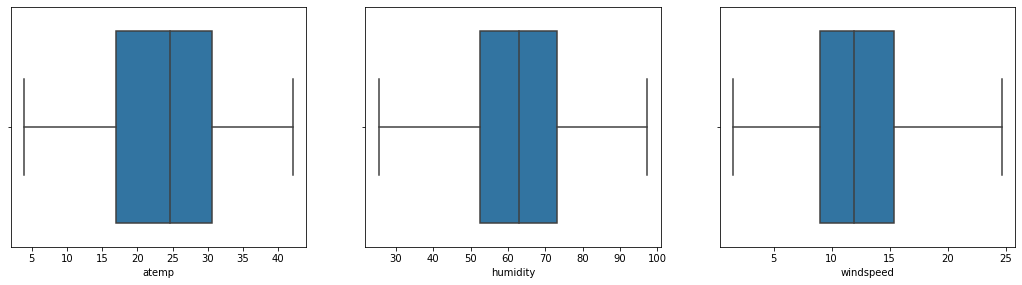

In [14]:
#confirm to check if outliers are removed
plt.figure(figsize=(18,15))
plt.subplot(3,3,1)
sns.boxplot(x='atemp', data=bike_df)
plt.subplot(3,3,2)
sns.boxplot(x='humidity', data=bike_df)
plt.subplot(3,3,3)
sns.boxplot(x='windspeed', data=bike_df)
plt.show()

## Step 4: Data Preparation

### Dummy Variables

In [15]:
bike_df

,season,year,month,holiday,weekday,workingday,weathersit,atemp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,mist,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,mist,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,clear,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,clear,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,clear,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,Dec,0,Thu,1,mist,11.33210,65.2917,23.458911,2114
726,spring,1,Dec,0,Fri,1,mist,12.75230,59.0000,10.416557,3095
727,spring,1,Dec,0,Sat,0,mist,12.12000,75.2917,8.333661,1341
728,spring,1,Dec,0,Sun,0,clear,11.58500,48.3333,23.500518,1796


In [16]:
#We have 4 key caterogical variables - weather, weekday, month and season
#All these columns have more than 2 levels, which means we can remove one column for better execution
dummy_season = pd.get_dummies(bike_df['season'], drop_first = True)
dummy_month = pd.get_dummies(bike_df['month'], drop_first = True)
dummy_weekday = pd.get_dummies(bike_df['weekday'], drop_first = True)
dummy_weather = pd.get_dummies(bike_df['weathersit'], drop_first = True)

bike_df = pd.concat([bike_df, dummy_season], axis = 1)
bike_df = pd.concat([bike_df, dummy_month], axis = 1)
bike_df = pd.concat([bike_df, dummy_weekday], axis = 1)
bike_df = pd.concat([bike_df, dummy_weather], axis = 1)


# Drop 'season, mnth, weekday, weathersit' as we have created the dummies for it
bike_df = bike_df.drop(['season','month','weekday','weathersit'],axis=1)

In [17]:
#checking final columns after dropping
bike_df.columns

Index(['year', 'holiday', 'workingday', 'atemp', 'humidity', 'windspeed',
       'count', 'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan',
       'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun',
       'Thu', 'Tue', 'Wed', 'light_snow', 'mist'],
      dtype='object')

In [18]:
# checking the shape again
bike_df.shape

(712, 29)

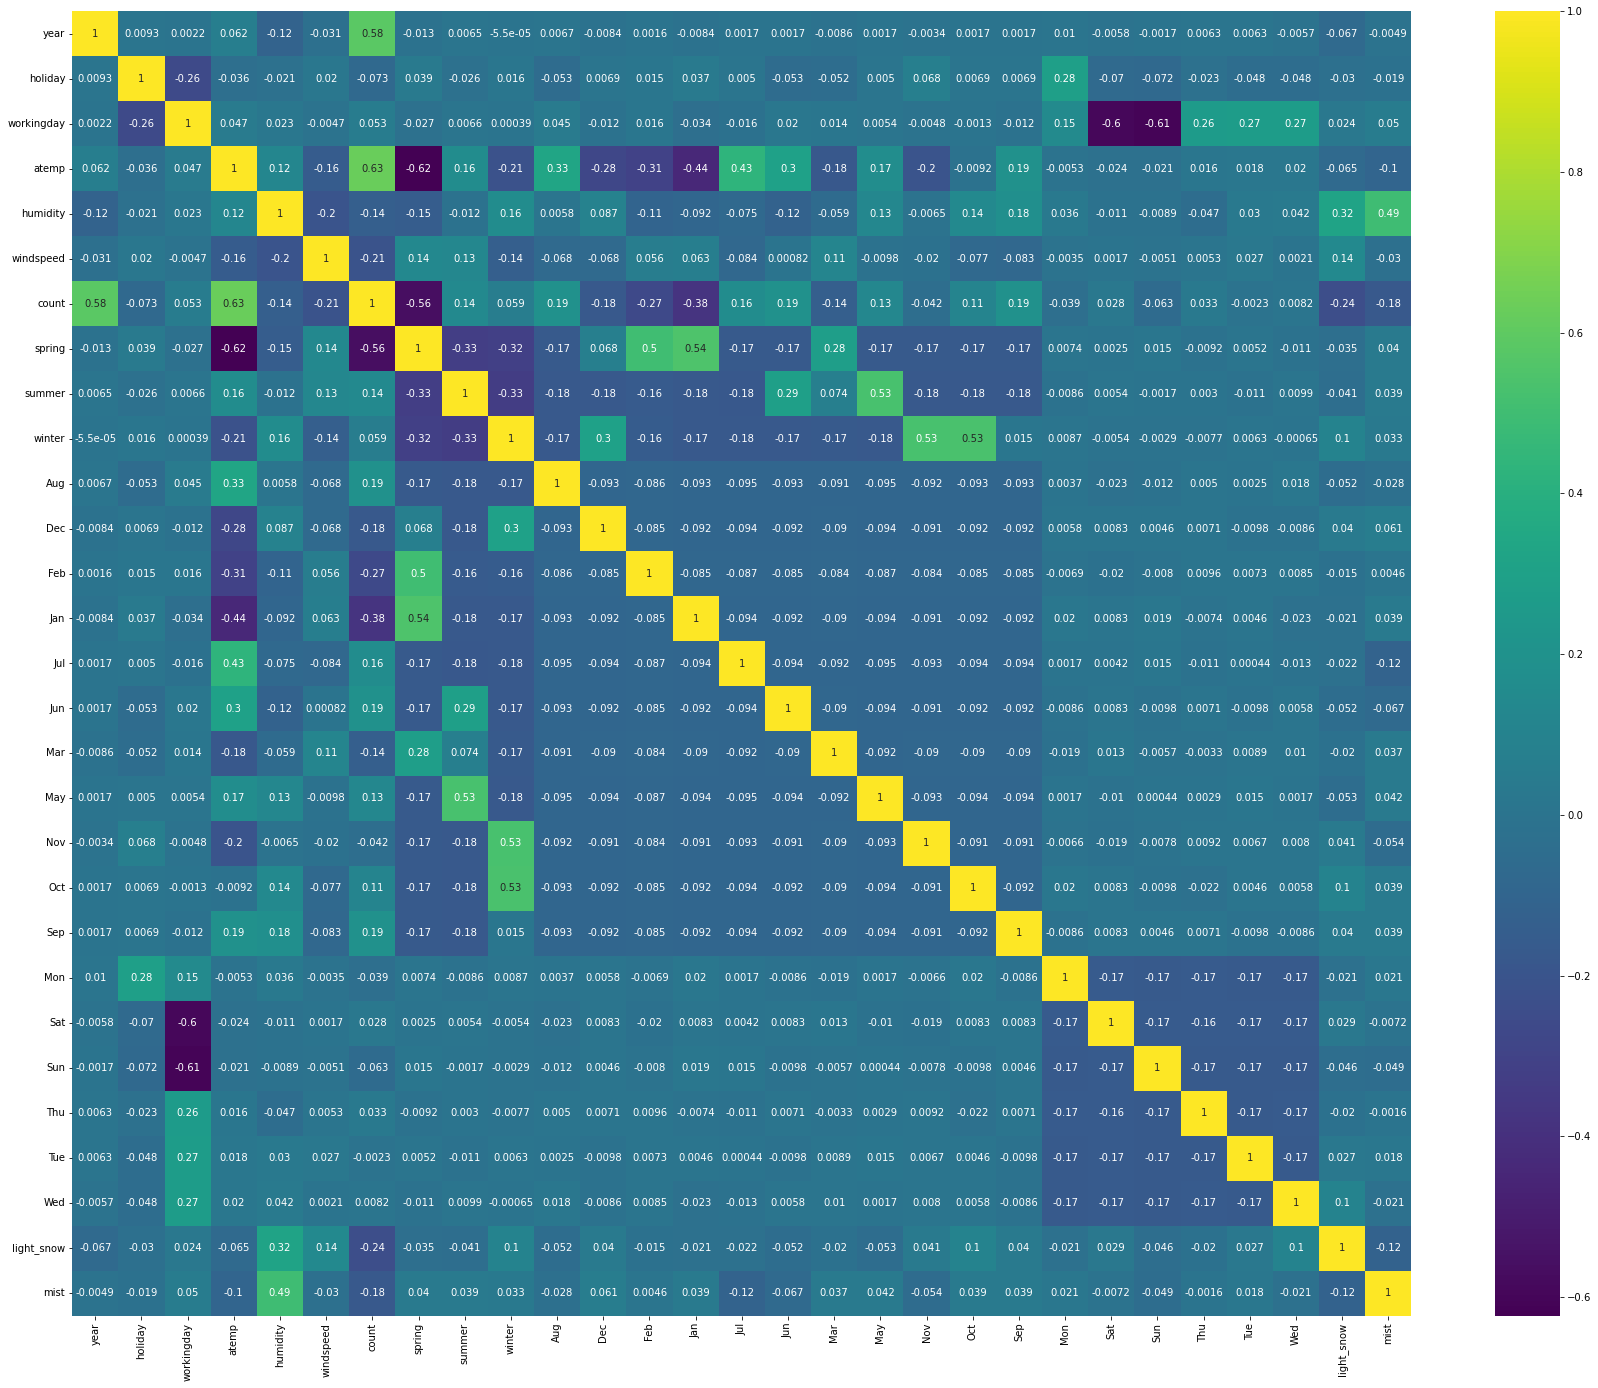

In [19]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize=(30,24))
sns.heatmap(bike_df.corr(), annot=True, cmap='viridis')
plt.show()

As we observed earlier as well in pair plots, same is showing here - that atemp and count are highly correlated

## Step 5: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [20]:
# We specify random state so that the train and test data set always have the same rows, respectively
bike_train,bike_test = train_test_split(bike_df,train_size=0.7,random_state=100)
# print shape of train & test data
print(bike_train.shape)
print(bike_test.shape)

(498, 29)
(214, 29)


### Rescaling the Features 


#### doing this step to scale certain columns so all columns come at similar scale using Min-Max scaling method

In [21]:
# To scale, use a normalised scaler
scaler = MinMaxScaler()
# select column and store in `numeric_variables` to perform scaling
numeric_variables  = ['atemp','humidity','windspeed','count']
# fit and transform training set
bike_train[numeric_variables] = scaler.fit_transform(bike_train[numeric_variables])
# checking latest 5 rows after operation
bike_train.head()

,year,holiday,workingday,atemp,humidity,windspeed,count,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,light_snow,mist
423,1,0,1,0.367262,0.140157,0.494614,0.499425,1,0,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,0,0.204242,0.271097,0.949641,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
503,1,0,0,0.652800,0.230569,0.178102,0.951680,0,1,0,...,0,0,0,1,0,0,0,0,0,0
116,0,0,1,0.663818,0.797978,0.838141,0.442936,0,1,0,...,0,0,0,0,0,0,0,1,0,1
581,1,0,0,0.872485,0.524249,0.775155,0.626093,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Dividing data into X and y sets for the model building

In [22]:
# X_train, y_train
y_train = bike_train.pop('count')
X_train = bike_train

## Building our model

We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Using Recursive feature elimination

In [23]:
# Using SKLearn, create a Lienar Regression model for RFE.
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm)
rfe = rfe.fit(X_train,y_train) 

In [24]:
#This is to map columns with ranks and which columns would be considered for ranking via true and false
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 9),
 ('winter', True, 1),
 ('Aug', False, 6),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', False, 11),
 ('Jun', False, 7),
 ('Mar', False, 14),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 15),
 ('Sep', False, 3),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 13),
 ('Tue', False, 10),
 ('Wed', False, 12),
 ('light_snow', True, 1),
 ('mist', False, 5)]

In [25]:
# filter out selected features
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'atemp', 'humidity', 'windspeed',
       'spring', 'winter', 'Dec', 'Jan', 'Nov', 'Sat', 'Sun', 'light_snow'],
      dtype='object')

In [26]:
# checking non selected features
X_train.columns[~rfe.support_]

Index(['summer', 'Aug', 'Feb', 'Jul', 'Jun', 'Mar', 'May', 'Oct', 'Sep', 'Mon',
       'Thu', 'Tue', 'Wed', 'mist'],
      dtype='object')

In [27]:
# creating new variable to store selected feature
X_train_rfe = X_train[col]

In [28]:
X_train_rfe

,year,holiday,workingday,atemp,humidity,windspeed,spring,winter,Dec,Jan,Nov,Sat,Sun,light_snow
423,1,0,1,0.367262,0.140157,0.494614,1,0,0,0,0,0,0,0
728,1,0,0,0.204242,0.271097,0.949641,1,0,1,0,0,0,1,0
503,1,0,0,0.652800,0.230569,0.178102,0,0,0,0,0,1,0,0
116,0,0,1,0.663818,0.797978,0.838141,0,0,0,0,0,0,0,0
581,1,0,0,0.872485,0.524249,0.775155,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,1,0,1,0.770263,0.324722,0.345323,0,0,0,0,0,0,0,0
55,0,0,1,0.363162,0.613549,0.937451,1,0,0,0,0,0,0,0
357,0,0,0,0.294623,0.359639,0.485611,1,0,1,0,0,1,0,0
82,0,0,1,0.256608,0.753706,0.640287,0,0,0,0,0,0,0,0


In [29]:
# Using statsmodels so we can add constant variable
import statsmodels.api as sm 

In [30]:
#adding variables which are constant
X_train_rfe = sm.add_constant(X_train_rfe)

In [31]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [32]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     212.4
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.04e-190
Time:                        16:28:54   Log-Likelihood:                 513.13
No. Observations:                 498   AIC:                            -998.3
Df Residuals:                     484   BIC:                            -939.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2610      0.022     11.861      0.0

`const` is insignificant in presence of other variables

In [33]:
# droping `const`
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [34]:
#Calculate VIF using statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,32.76
12,Sun,7.71
11,Sat,6.70
3,atemp,2.89
6,spring,2.78
1,holiday,2.45
7,winter,2.37
10,Nov,1.75
9,Jan,1.60
8,Dec,1.43


In [36]:
# Dropping 'workingday' , as we can see very high value
X_train_new = X_train_new.drop(['workingday'], axis=1)

In [37]:
X_train_lm = sm.add_constant(X_train_new)

In [38]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [39]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     212.4
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.04e-190
Time:                        16:28:54   Log-Likelihood:                 513.13
No. Observations:                 498   AIC:                            -998.3
Df Residuals:                     484   BIC:                            -939.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3485      0.027     12.949      0.0

## Residual Analysis of the train data
check if the error terms are also normally distributed

In [40]:
y_train_predicted = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

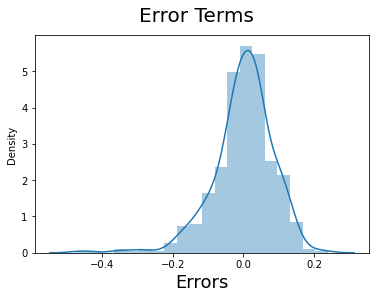

In [41]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_predicted), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)              
plt.xlabel('Errors', fontsize = 18)                         

## Making Predictions

#### Applying the scaling on the test sets

In [42]:
# selecting columns for scaling
bike_test[numeric_variables] = scaler.transform(bike_test[numeric_variables])

bike_test.head()

,year,holiday,workingday,atemp,humidity,windspeed,count,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,light_snow,mist
585,1,0,1,0.830239,0.476238,0.386691,0.835711,0,0,0,...,0,0,0,0,0,1,0,0,0,0
717,1,0,1,0.352057,0.483721,0.467646,0.603428,0,0,1,...,0,0,0,0,0,0,0,1,0,0
294,0,0,0,0.463565,0.489332,0.203239,0.493097,0,0,1,...,1,0,0,1,0,0,0,0,0,0
157,0,0,1,0.771951,0.442568,0.478392,0.553497,0,1,0,...,0,0,0,0,0,0,1,0,0,0
627,1,0,1,0.606345,0.473120,0.276987,0.885642,0,0,0,...,0,1,0,0,0,1,0,0,0,0


#### Dividing into X_test and y_test

In [43]:
y_test = bike_test.pop('count')
X_test = bike_test

In [44]:
# Creating X_test_new dataframe by dropping variables from X_test and adding constant
X_test_new = X_test[X_train_new.columns]


X_test_new = sm.add_constant(X_test_new)

In [45]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

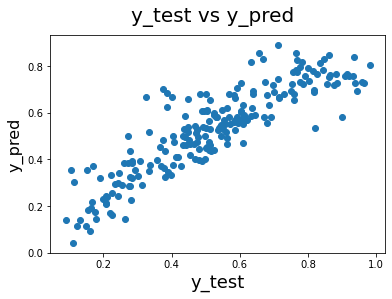

In [46]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)                        

In [47]:
# Using r2_score from sklearn for cheking r-squared score for test data
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7719319441384994

As we can see train r-squared score and  `0.832`
test r-squared score is `0.7719319441384994`

diffrence is less then `.06` so we can mark as good model

## Variables are significant in predicting the demand for shared bikes:

- atemp
- Season (Summer, Fall)
- Months (May-Oct)
- Holiday
- Windspeed
- Weathersit (Clear)

## Variables describe the bike demands

- Season - Marketing team needs a different startegy to attract customers in the winter season
- Months - Company has to provide some discounts in months from Jan-Apr 
- 2019 seems increasing in sales , it's indicates after covide unlock users are increasing and increase in year on year business
- Temprature was highly Positive correlated with bike renting, so company needs to focus on most selling in days where temp are moderate and favourable